# Final
## Emily Hendrickson
### 11.29.23

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

***

#### Q1
#### # 1. Read in the data



In [2]:
s = pd.read_csv('C:\\Users\\ehhen\\Documents\\Georgetown\\Fall 2023\\Programming II\\social_media_usage.csv')
print(f'The dimensions of the dataframe are: {s.shape}')


The dimensions of the dataframe are: (1502, 89)


***

#### Q2

##### 2. Define a function called clean_sm

In [3]:
def clean_sm(x):
    if x == 1:
        return 1
    else:
        return 0

In [4]:
# Test the function with a toy dataframe
toy_df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [1, 0, 1]})
toy_df = toy_df.applymap(clean_sm)
print(toy_df)

   col1  col2
0     1     1
1     0     0
2     0     1


***

#### Q3
#### 3. Create a new dataframe "ss"


In [5]:
# Create the new DataFrame
ss = s[['income', 'educ2', 'par', 'marital', 'gender', 'age']].copy()
ss['sm_li'] = s['web1h'].apply(clean_sm)

# Filter the DataFrame based on the conditions
ss = ss[(ss['income'] <= 9) & (ss['educ2'] <= 8) & (ss['par'] <= 2) & ((ss['marital'] == 1) | (ss['marital'] == 6)) & (ss['age'] <= 98)].dropna()

# Perform exploratory analysis
print(ss.describe())



           income       educ2         par     marital      gender         age  \
count  879.000000  879.000000  879.000000  879.000000  879.000000  879.000000   
mean     6.308305    5.358362    1.726962    2.535836    1.406143   48.885097   
std      2.335584    1.901359    0.445774    2.307910    0.603716   17.955443   
min      1.000000    1.000000    1.000000    1.000000    1.000000   18.000000   
25%      5.000000    4.000000    1.000000    1.000000    1.000000   34.000000   
50%      7.000000    6.000000    2.000000    1.000000    1.000000   49.000000   
75%      8.000000    7.000000    2.000000    6.000000    2.000000   64.000000   
max      9.000000    8.000000    2.000000    6.000000    9.000000   92.000000   

            sm_li  
count  879.000000  
mean     0.356086  
std      0.479114  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


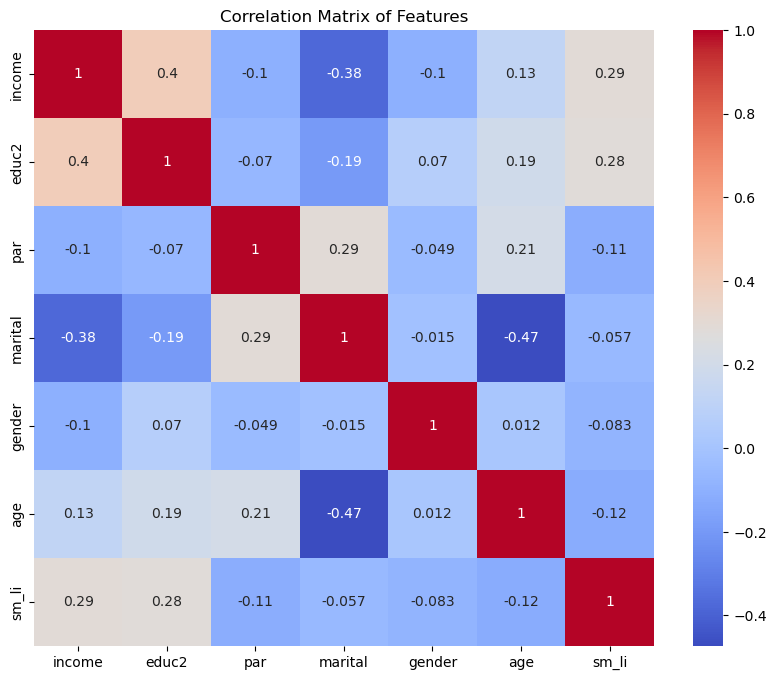

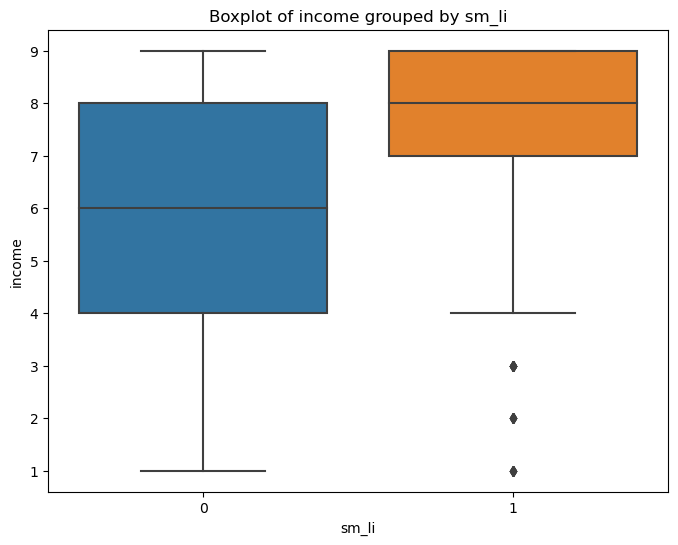

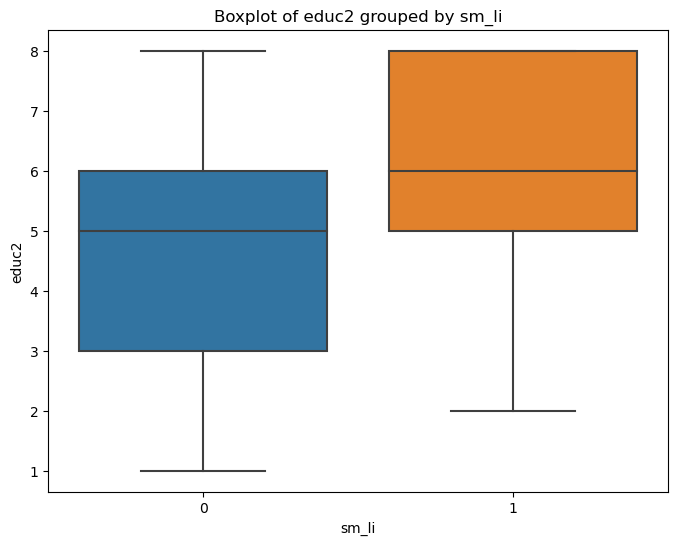

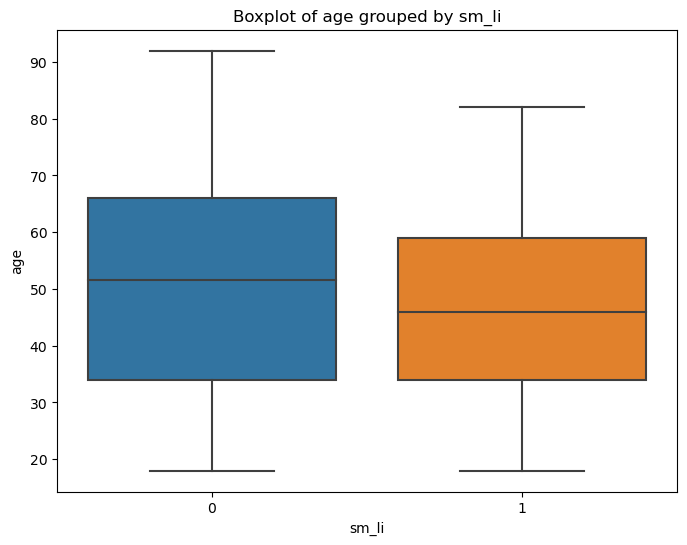

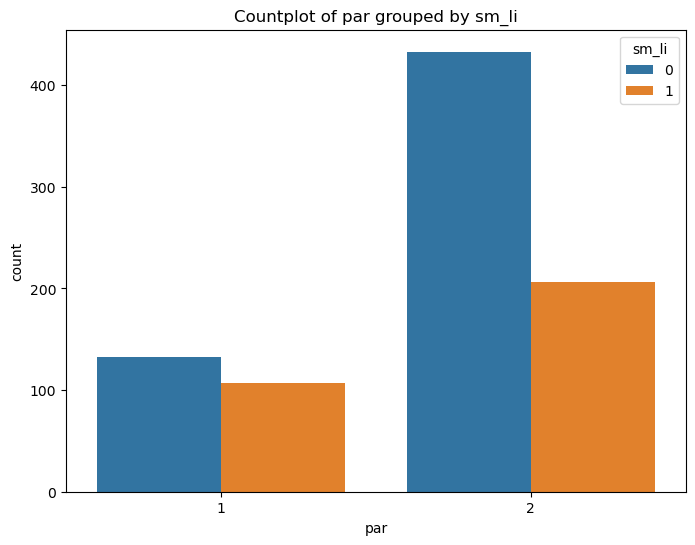

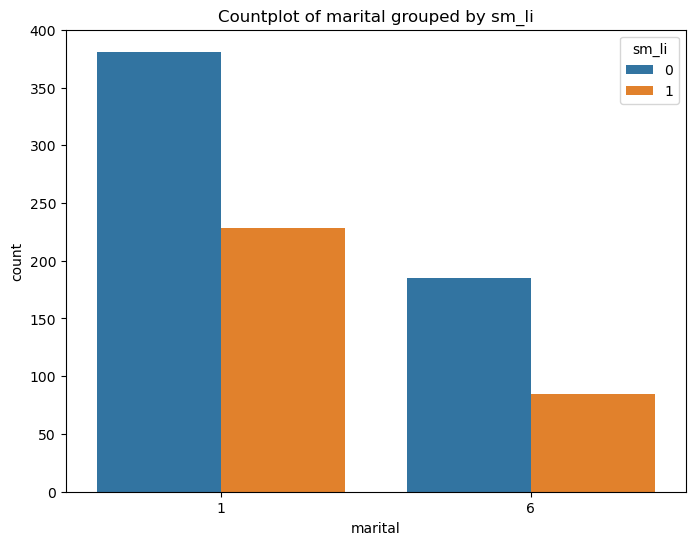

In [6]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(ss.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Boxplot for each numeric variable
for col in ['income', 'educ2', 'age']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sm_li', y=col, data=ss)
    plt.title(f'Boxplot of {col} grouped by sm_li')
    plt.show()

# Countplot for each categorical variable
for col in ['par', 'marital']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='sm_li', data=ss)
    plt.title(f'Countplot of {col} grouped by sm_li')
    plt.show()

***

#### Q4
#### 4. Create a target vector (y) and feature set (X)


In [7]:
y = ss['sm_li']
X = ss.drop('sm_li', axis=1)


***

#### Q5
#### 5. Split the data into training and test sets



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

#### Q6
#### 6. Instantiate a logistic regression model



In [9]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

***

#### Q7
#### 7. Evaluate the model


In [10]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f'Model Accuracy: {model.score(X_test, y_test)}')
print(f'Confusion Matrix: \n{cm}')


Model Accuracy: 0.6136363636363636
Confusion Matrix: 
[[65 50]
 [18 43]]


***

#### Q8
#### 8. Create the confusion matrix as a dataframe



In [11]:
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                  65                  50
Actual Positive                  18                  43


***

#### Q9
#### 9. Calculate precision, recall, and F1 score



In [12]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * precision * recall / (precision + recall)
print(f'Precision: {precision}\nRecall: {recall}\nF1 Score: {f1_score}')


# Check metrics with sklearn's classification_report
print(classification_report(y_test, y_pred))


Precision: 0.46236559139784944
Recall: 0.7049180327868853
F1 Score: 0.5584415584415585
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       115
           1       0.46      0.70      0.56        61

    accuracy                           0.61       176
   macro avg       0.62      0.64      0.61       176
weighted avg       0.67      0.61      0.62       176



***

#### Q10
#### 10. Use the model to make predictions



In [13]:
# Define the instances
instance1 = pd.DataFrame({'income': [8], 'educ2': [7], 'par': [2], 'marital': [1], 'gender': [2], 'age': [42]})
instance2 = pd.DataFrame({'income': [8], 'educ2': [7], 'par': [2], 'marital': [1], 'gender': [2], 'age': [82]})

# Make predictions
prob1 = model.predict_proba(instance1)[:, 1]
prob2 = model.predict_proba(instance2)[:, 1]

print(f'The probability that the first person uses LinkedIn is {prob1[0]}')
print(f'The probability that the second person uses LinkedIn is {prob2[0]}')

The probability that the first person uses LinkedIn is 0.6829249100136576
The probability that the second person uses LinkedIn is 0.3833502347795964


***